In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
df = pd.read_csv("data/public.csv")
#peek
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [4]:
df_clean = df[
    (df['ConvertedCompYearly'] > 1000) & 
    (df['ConvertedCompYearly'] < 500000)
]

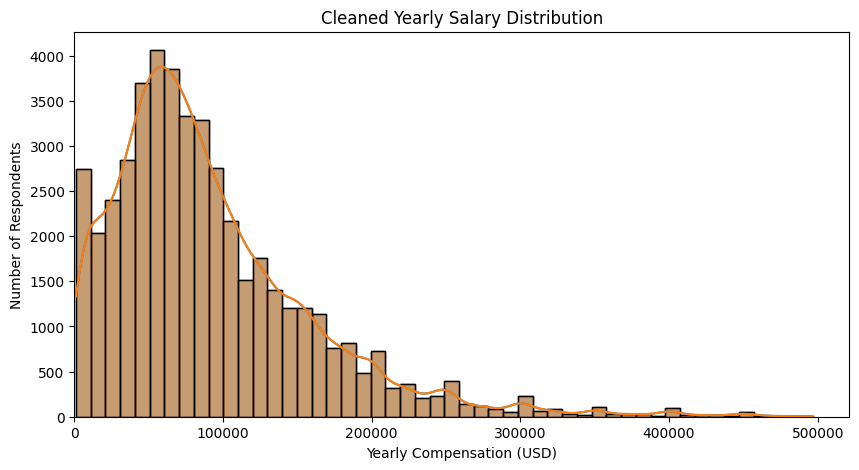

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Cleaned Yearly Salary Distribution')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.xlim(left=0)
sns.histplot(df_clean['ConvertedCompYearly'], bins=50, kde=True)
plt.xlim(left=0)
plt.title('Cleaned Yearly Salary Distribution')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.show()

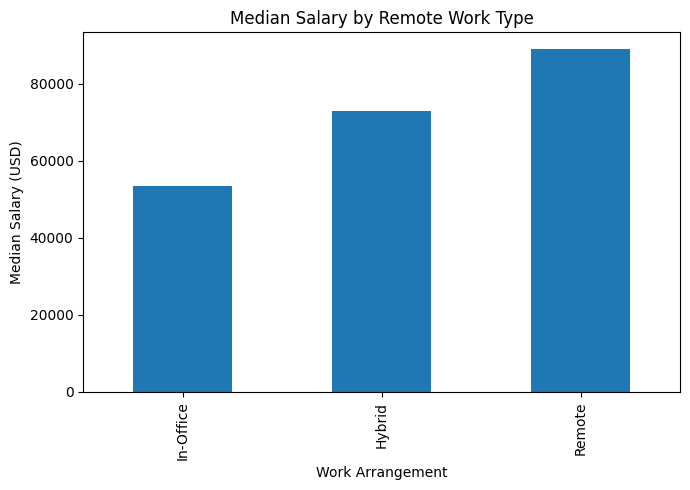

In [6]:
df_clean = df_clean.copy()

remote_map = {
    'Remote': 'Remote',
    'Hybrid (some remote, some in-person)': 'Hybrid',
    'In-person': 'In-Office'
}

df_clean['RemoteWorkShort'] = df_clean['RemoteWork'].map(remote_map)

plt.figure(figsize=(7, 5))
df_clean.groupby('RemoteWorkShort')['ConvertedCompYearly'].median().sort_values().plot(kind='bar')
plt.title("Median Salary by Remote Work Type")
plt.xlabel("Work Arrangement")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()



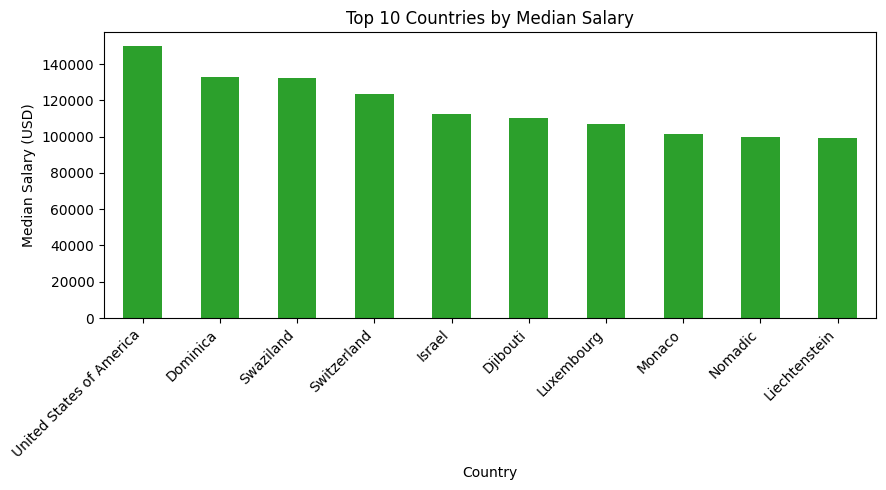

In [7]:
country_income = df_clean.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False)
top_countries = country_income.head(10)

plt.figure(figsize=(9,5))
top_countries.plot(kind='bar', color='#2ca02c')
plt.title('Top 10 Countries by Median Salary')
plt.xlabel('Country')
plt.ylabel('Median Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


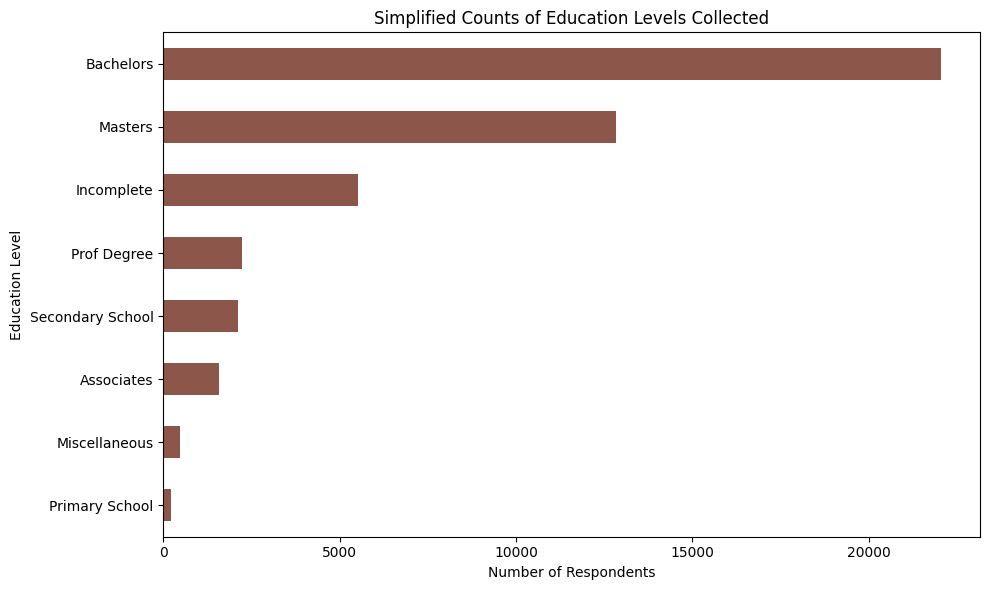

In [8]:
df_clean = df_clean.copy()

school_map = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelors",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Masters",
    "Some college/university study without earning a degree": "Incomplete",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Prof Degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary School",
    "Associate degree (A.A., A.S., etc.)": "Associates",
    "Something else": "Miscellaneous",
    "Primary/elementary school": "Primary School"
}

df_clean['EdLevelShort'] = df_clean['EdLevel'].map(school_map)

edu_counts = df_clean['EdLevelShort'].value_counts()

plt.figure(figsize=(10,6))
edu_counts.plot(kind='barh', color='#8c564b')
plt.title("Simplified Counts of Education Levels Collected")
plt.xlabel("Number of Respondents")
plt.ylabel("Education Level")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
